In [22]:
# import osmnx as ox
import pandas as pd
import geopandas as gpd
import networkx as nx

import warnings
import sys
import os
warnings.filterwarnings("ignore")
sys.stderr = open(os.devnull, 'w')

# local crs
local_crs = 32636
# path to data

## Препроцессинг данных

In [32]:
graph = nx.read_graphml('data/graph.graphml')
graph_crs = graph.graph['crs']
okrugs = gpd.read_parquet('data/model_data/okrugs.parquet')
rayons = gpd.read_parquet('data/model_data/rayons.parquet')
territories = gpd.read_file('data/territories/shlis.geojson').to_crs(graph_crs)
towns = gpd.read_parquet('/Users/mvin/Code/PopFrame/examples/data/model_data/towns.parquet').to_crs(graph_crs)

In [33]:
from popframe.preprocessing.level_filler import LevelFiller
level_filler = LevelFiller(towns=towns)
towns = level_filler.fill_levels()
towns

,geometry,name,population,level
0,POINT (543142.339 6580637.744),Болото,111,Малое сельское поселение
1,POINT (544532.929 6593228.214),Большой Остров,116,Малое сельское поселение
2,POINT (544895.402 6593052.876),Бор,116,Малое сельское поселение
3,POINT (543993.111 6589582.121),Бороватое,114,Малое сельское поселение
4,POINT (538540.110 6576793.684),Бочево,108,Малое сельское поселение
...,...,...,...,...
2926,POINT (399059.742 6560341.471),Апраксин Бор,96,Малое сельское поселение
2927,POINT (403967.171 6562087.081),Александровка,98,Малое сельское поселение
2928,POINT (413116.740 6573793.279),Большая Горка,100,Малое сельское поселение
2929,POINT (412458.032 6574811.307),Дроздово,101,Малое сельское поселение


In [34]:
import pandas as pd

# Use pandas to read the Parquet file
adj_mx = pd.read_parquet('/Users/mvin/Code/PopFrame/examples/data/model_data/max_connectivity_newroads.parquet')

# Display the loaded DataFrame
adj_mx

,0,1,2,3,4,5,6,7,8,9,...,2921,2922,2923,2924,2925,2926,2927,2928,2929,2930
0,0.000000,11.687417,12.024583,10.793467,7.706417,3.430783,21.595867,28.751767,8.414917,17.122383,...,129.784298,131.454224,129.321091,134.594058,139.427198,139.427198,132.374215,137.076741,135.733408,136.884615
1,11.687417,0.000000,0.337167,4.313350,17.966250,13.690617,29.636783,36.792683,16.455833,10.347433,...,118.718315,120.388241,118.255108,123.528074,128.361215,128.361215,121.308231,126.010758,124.667424,125.818631
2,12.024583,0.337167,0.000000,4.650517,18.303417,14.027783,29.973950,37.129850,16.246817,10.684600,...,118.381148,120.051074,117.917941,123.190908,128.024048,128.024048,120.971065,125.673591,124.330258,125.481465
3,10.793467,4.313350,4.650517,0.000000,17.072300,12.796667,28.742833,35.898733,15.561883,9.748317,...,122.410231,124.080158,121.947024,127.219991,132.053131,132.053131,125.000148,129.702674,128.359341,129.510548
4,7.706417,17.966250,18.303417,17.072300,0.000000,4.275633,27.874700,35.030600,14.693750,23.401217,...,136.063131,137.733058,135.599924,140.872891,145.706031,145.706031,138.653048,143.355574,142.012241,143.163448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,141.056867,129.990884,129.653717,133.682801,147.335701,143.060067,159.006234,166.162134,143.397184,139.716884,...,24.994667,29.116733,31.821667,32.256567,0.000000,0.000000,17.445683,39.577317,38.233983,32.094983
2927,134.003884,122.937901,122.600734,126.629817,140.282717,136.007084,151.953251,159.109151,136.344201,132.663901,...,17.941683,22.063750,24.768683,25.203583,17.445683,17.445683,0.000000,32.524333,31.181000,25.042000
2928,137.084040,126.018056,125.680890,129.709973,143.362873,139.087240,155.033406,162.189306,139.424356,135.744056,...,18.604083,10.685517,7.755650,13.825350,39.581700,39.581700,32.528717,0.000000,1.343333,26.855167
2929,135.740706,124.674723,124.337556,128.366640,142.019540,137.743906,153.690073,160.845973,138.081023,134.400723,...,17.260750,9.342183,6.412317,12.482017,38.238367,38.238367,31.185383,1.343333,0.000000,25.511833


In [24]:
from popframe.preprocessing.adjacency_calculator import AdjacencyCalculator

try:
  adj_mx = pd.read_pickle('data/model_data/adj_mx.pkl')
except:
  from popframe.preprocessing.adjacency_calculator import AdjacencyCalculator
  blocks = towns.copy()
  blocks.geometry = blocks.geometry.buffer(0.01)
  ac = AdjacencyCalculator(blocks=blocks, graph=graph)
  adj_mx = ac.get_dataframe()

## Создание модели


In [35]:
territories = gpd.read_file('data/territories/shlis.geojson').to_crs(graph_crs)
territories['name'].fillna('', inplace=True)

In [36]:
from popframe.models.region import Region

region = Region(
  towns=towns,
  settlements=okrugs, 
  districts=rayons, 
  accessibility_matrix=adj_mx,
  territories=territories
)

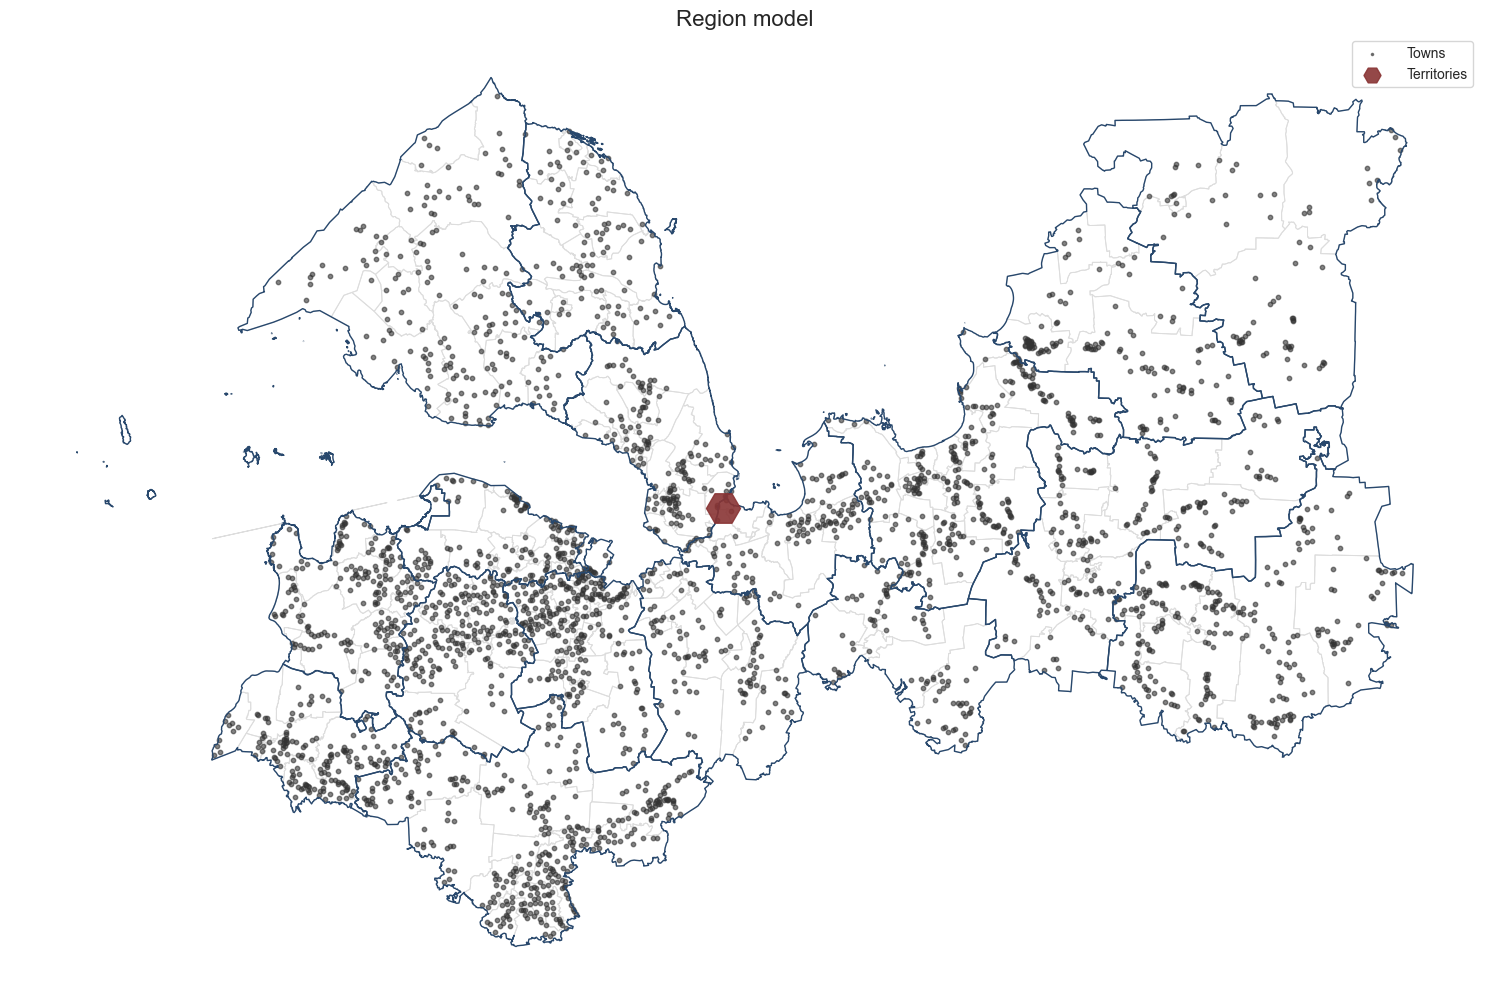

In [37]:
region.plot()

In [14]:
region.get_towns_gdf()

,id,name,population,level,geometry,settlement_name,district_name
0,0,Болото,111,Малое сельское поселение,POINT (543142.339 6580637.744),Борское сельское поселение,Бокситогорский муниципальный район
1,1,Большой Остров,116,Малое сельское поселение,POINT (544532.929 6593228.214),Борское сельское поселение,Бокситогорский муниципальный район
2,2,Бор,116,Малое сельское поселение,POINT (544895.402 6593052.876),Борское сельское поселение,Бокситогорский муниципальный район
3,3,Бороватое,114,Малое сельское поселение,POINT (543993.111 6589582.121),Борское сельское поселение,Бокситогорский муниципальный район
4,4,Бочево,108,Малое сельское поселение,POINT (538540.110 6576793.684),Борское сельское поселение,Бокситогорский муниципальный район
...,...,...,...,...,...,...,...
2926,2926,Апраксин Бор,96,Малое сельское поселение,POINT (399059.742 6560341.471),Трубникоборское сельское поселение,Тоснненский муниципальный район
2927,2927,Александровка,98,Малое сельское поселение,POINT (403967.171 6562087.081),Трубникоборское сельское поселение,Тоснненский муниципальный район
2928,2928,Большая Горка,100,Малое сельское поселение,POINT (413116.740 6573793.279),Трубникоборское сельское поселение,Тоснненский муниципальный район
2929,2929,Дроздово,101,Малое сельское поселение,POINT (412458.032 6574811.307),Трубникоборское сельское поселение,Тоснненский муниципальный район


In [38]:
# region.to_pickle('Ленинградская область3.pickle')

## Обновление слоев

## Работа с моделью - Создание каркаса

In [17]:
from popframe.method.popuation_frame import PopFrame
from popframe.models.region import Region

In [29]:
# Создание экземпляра GraphMethod с данными
region_model = Region.from_pickle('/Users/mvin/Code/PopFrame/examples/data/data_models/Ленинградская область.pickle')
frame_method = PopFrame(region=region_model)

# Получение графа
G = frame_method.build_network_frame()


In [30]:
num_edges = G.number_of_edges()
print("Количество рёбер в графе:", num_edges)


Количество рёбер в графе: 2930


In [22]:
G

In [ ]:
# G.nodes(data=True)

In [ ]:
# G.edges(data=True)

In [20]:
gdf_frame = frame_method.save_graph_to_geojson(G, None)
gdf_frame

,geometry,name,level,population
0,POINT (33.75892 59.36227),Болото,Малое сельское поселение,111.0
1,POINT (33.78600 59.47518),Большой Остров,Малое сельское поселение,116.0
2,POINT (33.79236 59.47356),Бор,Малое сельское поселение,116.0
3,POINT (33.77572 59.44249),Бороватое,Малое сельское поселение,114.0
4,POINT (33.67728 59.32820),Бочево,Малое сельское поселение,108.0
...,...,...,...,...
5856,"LINESTRING (30.60534 59.49722, 30.58271 59.48439)",NaN,Малое сельское поселение,NaN
5857,"LINESTRING (30.52914 59.66430, 30.54176 59.63431)",NaN,Среднее сельское поселение,NaN
5858,"LINESTRING (30.52914 59.66430, 30.50370 59.63608)",NaN,Среднее сельское поселение,NaN
5859,"LINESTRING (30.52914 59.66430, 30.50283 59.68264)",NaN,Среднее сельское поселение,NaN


In [18]:
# gdf_frame = frame_method.save_graph_to_geojson(G, 'karkas_graph_Moscow_obl.geojson')
# gdf_frame

Graph successfully saved to karkas_graph_Moscow_obl.geojson with all node attributes.


In [31]:
frame_method.get_graph_html(G, 'final_graph_with_legend.html')

### Кракас населения - версия 2

In [ ]:
from popframe.method.popuation_frame import PopFrame
from popframe.models.region import Region
region_model = Region.from_pickle('/Users/mvin/Code/PopFrame/examples/data/data_models/Москва.pickle')

In [ ]:
visualizer = PopFrame(region=region_model)
output = visualizer.build_circle_frame(output_type='html')  # or 'gdf'
output

'HTML map saved as final_circle.html'

In [ ]:
from popframe.method.popuation_frame import PopFrame
visualizer = PopFrame(region=region_model)
output = visualizer.build_circle_frame(output_type='gdf')  # or 'gdf'
output

,id,name,population,level,geometry,settlement_name,district_name
0,0,Серебряные Пруды,9358,Малый город,"POLYGON ((38.73204 54.46798, 38.73199 54.46703...",Московская область,Серебряные Пруды
1,1,Узуново,3417,Крупное сельское поселение,"POLYGON ((38.62418 54.54061, 38.62415 54.54004...",Московская область,Серебряные Пруды
2,2,Благодать,52,Малое сельское поселение,"POLYGON ((38.63076 54.47175, 38.63075 54.47161...",Московская область,Серебряные Пруды
3,3,Ступино,66463,Средний город,"POLYGON ((38.10304 54.88660, 38.10292 54.88407...",Московская область,Ступино
4,4,Кашира,39929,Малый город,"POLYGON ((38.17049 54.83745, 38.17040 54.83549...",Московская область,Кашира
...,...,...,...,...,...,...,...
2860,2860,Шелгуново,9,Малое сельское поселение,"POLYGON ((35.60876 56.37178, 35.60876 56.37173...",Московская область,Лотошино
2861,2861,Мазлово,2,Малое сельское поселение,"POLYGON ((35.68795 56.36313, 35.68794 56.36310...",Московская область,Лотошино
2862,2862,Себудово,2,Малое сельское поселение,"POLYGON ((35.52223 56.37250, 35.52223 56.37247...",Московская область,Лотошино
2863,2863,Введенское,694,Среднее сельское поселение,"POLYGON ((35.64112 56.37377, 35.64109 56.37325...",Московская область,Лотошино


In [ ]:
import matplotlib.colors as mcolors

def get_color_map(levels):
    base_colors = ['#FFC100', '#FF6500', '#C40C0C', '#6C0345']
    cmap = mcolors.LinearSegmentedColormap.from_list("heatmap", base_colors, N=len(levels))
    norm = mcolors.Normalize(vmin=0, vmax=len(levels) - 1)
    colors = [mcolors.to_hex(cmap(norm(i))) for i in range(len(levels))]
    return colors

levels = ["Малое сельское поселение", "Среднее сельское поселение", "Большое сельское поселение", "Крупное сельское поселение", "Малый город", "Средний город", "Большой город", "Крупный город", "Крупнейший город", "Сверхкрупный город"]
colors = get_color_map(levels)
print(colors)

['#ffc100', '#ffa200', '#ff8400', '#ff6500', '#eb4704', '#d82a08', '#c40c0c', '#a7091f', '#890632', '#6c0345']


In [ ]:
import matplotlib.colors as mcolors

def get_color_map(levels, base_colors):
    cmap = mcolors.LinearSegmentedColormap.from_list("heatmap", base_colors, N=len(levels))
    norm = mcolors.Normalize(vmin=0, vmax=len(levels) - 1)
    colors = [mcolors.to_hex(cmap(norm(i))) for i in range(len(levels))]
    return colors

def generate_sld(towns):
    levels = list(towns['level'].unique())
    levels.sort(key=lambda x: ["Малое сельское поселение", "Среднее сельское поселение", "Большое сельское поселение", "Крупное сельское поселение", "Малый город", "Средний город", "Большой город", "Крупный город", "Крупнейший город", "Сверхкрупный город"].index(x))
    
    # Используем указанные базовые цвета
    base_colors = ['#ffc100', '#ffa200', '#ff8400', '#ff6500', '#eb4704', '#d82a08', '#c40c0c', '#a7091f', '#890632', '#6c0345']
    level_colors = dict(zip(levels, get_color_map(levels, base_colors)))

    sld_template = '''
    <StyledLayerDescriptor version="1.0.0" xmlns="http://www.opengis.net/sld" xmlns:ogc="http://www.opengis.net/ogc" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.opengis.net/sld StyledLayerDescriptor.xsd">
      <NamedLayer>
        <Name>towns</Name>
        <UserStyle>
          <Title>Town Levels</Title>
          <FeatureTypeStyle>
            {rules}
          </FeatureTypeStyle>
        </UserStyle>
      </NamedLayer>
    </StyledLayerDescriptor>
    '''
    
    rule_template = '''
    <Rule>
      <Name>{level}</Name>
      <Title>{level}</Title>
      <ogc:Filter>
        <ogc:PropertyIsEqualTo>
          <ogc:PropertyName>level</ogc:PropertyName>
          <ogc:Literal>{level}</ogc:Literal>
        </ogc:PropertyIsEqualTo>
      </ogc:Filter>
      <PolygonSymbolizer>
        <Fill>
          <CssParameter name="fill">{color}</CssParameter>
        </Fill>
        <Stroke>
          <CssParameter name="stroke">#000000</CssParameter>
          <CssParameter name="stroke-width">1</CssParameter>
        </Stroke>
      </PolygonSymbolizer>
    </Rule>
    '''

    rules = ''.join([rule_template.format(level=level, color=color) for level, color in level_colors.items()])
    sld = sld_template.format(rules=rules)
    
    return sld

def save_sld_to_file(sld, filename):
    with open(filename, 'w', encoding='utf-8') as file:
        file.write(sld)


# Пример использования:
# towns - это ваш GeoDataFrame с данными
sld = generate_sld(output)
save_sld_to_file(sld, 'towns_style.sld')

NameError: name 'output' is not defined